# Traffic Signs Data Analysis 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from src.datasets import TrafficSignsDataset
from src.transforms import ImageTransforms, YoloBBox
from src.visualizations import ImageVisualizations

In [3]:
train_ds = TrafficSignsDataset(split="train")
category_names = train_ds.category_names
print("Categories:", category_names)
print(f"Train dataset length: {len(train_ds)}")

Categories: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']
Train dataset length: 3530


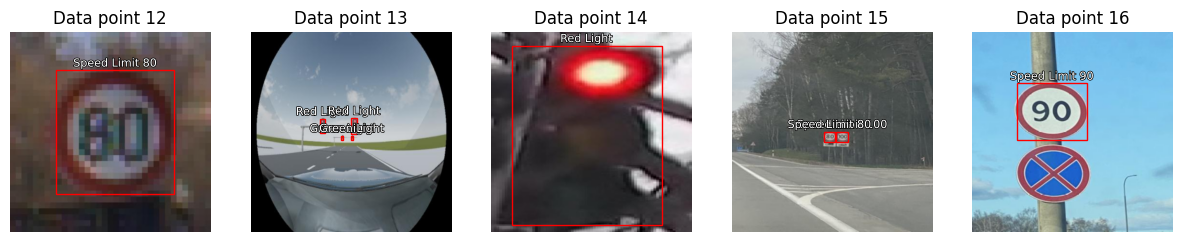

In [4]:
plots_range = range(12, 17)
plots_range_len = len(plots_range)
plt.figure(figsize=(15, 10))
for idx, plot_idx in enumerate(plots_range, start=1):
    img, annots = train_ds[plot_idx]
    
    img = ImageTransforms.postprocess(img)
    categories = [category_names[int(category_id)] for category_id in annots[:, 0]]
    bboxes = list(map(YoloBBox.postprocess, annots[:, 1:5]))
        
    plt.subplot(1, plots_range_len, idx)
    plt.title(f"Data point {plot_idx}")
    ImageVisualizations.plot_image_with_annotations(img, bboxes, categories)
plt.show()